In [ ]:
import pandas as pd

data = pd.read_pickle('/content/sample_data/dtm.pkl')
data = data.transpose()
data.head()

,Environment,Science,Business
aa,0,3,0
ab,1,0,0
abdul,13,0,0
abdullah,5,0,0
abdullahalmahmud,1,0,0


In [ ]:
# Find the top 30 words in each news category
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

In [ ]:
# Print the top 15 words in each news category
for cat, top_words in top_dict.items():
    print(cat)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Environment
said, bangladesh, forest, environment, climate, department, sundarbans, doe, water, government, tk, fish, people, river, change, energy, country, pollution, land, today, chattogram, brick, lakh, fined, dhaka, air, power, area, report, kilns
---
Science
bangladesh, research, nuclear, port, mongla, dengue, said, plant, won, award, student, mamun, rooppur, robot, dr, department, university, power, unloading, bronze, physics, steam, reactor, scientists, challenge, generator, mosquitoes, key, scientist, bangladeshi
---
Business
said, cent, tk, bangladesh, bank, countrys, year, new, government, according, mechanisation, workers, country, banks, women, fund, crore, order, factories, litchi, china, climate, varieties, firms, years, central, director, meet, fuel, tax
---


In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each news category
words = []
for cat in data.columns:
    top = [word for (word, count) in top_dict[cat]]
    for t in top:
        words.append(t)
        
words

In [ ]:
Counter(words).most_common()

In [ ]:
# If more than half of the news_type have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words

['said',
 'bangladesh',
 'climate',
 'department',
 'government',
 'tk',
 'country',
 'power']

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('/content/sample_data/clean_data.pkl')
data_clean

,Headlines
Environment,govt bans fishing in the bay of bengal for da...
Science,rooppur power plant unloading of key machines ...
Business,bondhu chula for healthy living bangladesh bon...


In [ ]:


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Headlines)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
d_s = data_stop.transpose()
d_s


,Environment,Science,Business
aa,0,3,0
ab,1,0,0
abdul,13,0,0
abdullah,5,0,0
abdullahalmahmud,1,0,0
...,...,...,...
zoology,5,0,0
zoom,0,0,1
zoos,3,0,0
zootaxaaccording,1,0,0


In [ ]:
# Find the top 30 words in each news category
top_dict = {}
for c in d_s.columns:
    top = d_s[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Business': [('cent', 63),
  ('bank', 33),
  ('countrys', 31),
  ('new', 30),
  ('year', 30),
  ('according', 29),
  ('mechanisation', 27),
  ('workers', 25),
  ('banks', 24),
  ('women', 22),
  ('fund', 21),
  ('crore', 20),
  ('order', 19),
  ('litchi', 19),
  ('factories', 19),
  ('china', 19),
  ('varieties', 18),
  ('firms', 17),
  ('central', 17),
  ('years', 17),
  ('director', 16),
  ('meet', 16),
  ('tax', 16),
  ('fuel', 16),
  ('clients', 15),
  ('sources', 15),
  ('lakh', 15),
  ('insurance', 15),
  ('farm', 15),
  ('loans', 15)],
 'Environment': [('forest', 287),
  ('environment', 222),
  ('sundarbans', 180),
  ('doe', 165),
  ('water', 154),
  ('people', 132),
  ('fish', 132),
  ('river', 131),
  ('change', 125),
  ('energy', 122),
  ('pollution', 121),
  ('land', 118),
  ('today', 115),
  ('chattogram', 112),
  ('brick', 111),
  ('lakh', 109),
  ('fined', 107),
  ('dhaka', 103),
  ('air', 101),
  ('area', 99),
  ('report', 98),
  ('kilns', 98),
  ('court', 97),
  ('worl

In [ ]:
def word_counts(cat):
  h=[]
  words=[]
  for l, n in (top_dict[cat]):
    h.append(n)
    words.append(l)
  return h,words
  

In [ ]:
h_env,words_env = word_counts("Environment")
h_sci,words_sci = word_counts("Science")
h_bus,words_bus = word_counts("Business")

#Top Words in Each Category of News

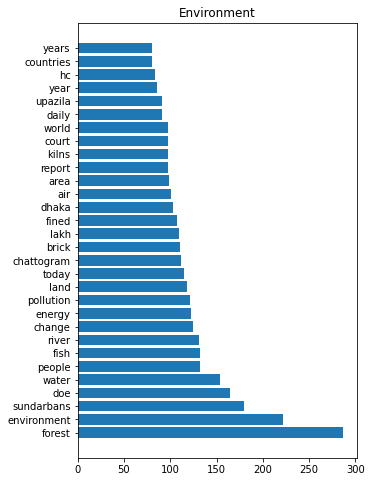

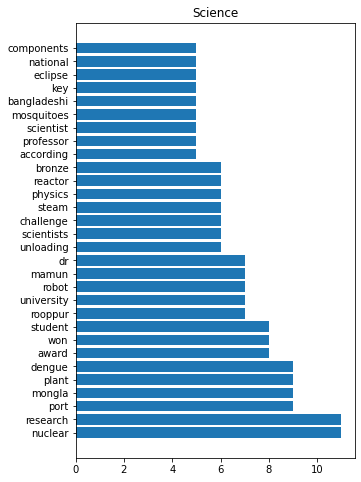

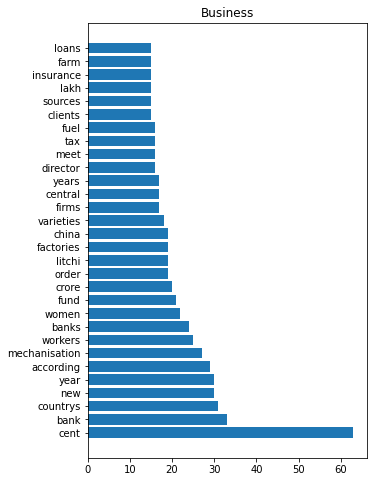

In [ ]:

plt.figure(figsize=(5, 8))
plt.title('Environment')
plt.barh(words_env,h_env)
plt.show()
plt.figure(figsize=(5, 8))
plt.title('Science')
plt.barh(words_sci,h_sci)
plt.show()
plt.figure(figsize=(5, 8))
plt.title('Business')
plt.barh(words_bus,h_bus)
plt.show()